<a href="https://colab.research.google.com/github/SARU230/Python-codes-for-gromacs/blob/main/Graduate_program_assignment_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and loading Moelcular dynamics analysis libraries

In [ ]:
!pip install mdtraj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp37-cp37m-linux_x86_64.whl size=5545870 sha256=f2f4adae6e9a2870b3f84ce3d543373fd1bd10423db3db3dc162991d2c50bfc8
  Stored in directory: /root/.cache/pip/wheels/6f/84/9d/6854e5264a4423209de26a6e4b34d13750289c72ba0439bbfd
Successfully built mdtraj


In [ ]:
!pip install MDAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.0 MB 26.4 MB/s 
     |████████████████████████████████| 376 kB 25.4 MB/s 
     |████████████████████████████████| 2.1 MB 49.2 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
  Created wheel for MDAnalysis: filename=MDAnalysis-2.1.0-cp37-cp37m-linux_x86_64.whl size=4649733 sha256=010e74de5d14705a26d928df21883cab8c725f4dd54080cd438bbbaafc8e4b03
  Stored in directory: /root/.cache/pip/wheels/fa/dd/6b/9d51e7216a401b71949467a123e3b2dffba11256346f7f7bda
Successfully built MDAnalysis


In [ ]:
!pip install nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 33.6 MB/s 
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057549 sha256=7a898256364694de2b88d1805d3a8f75ada3f3197879986087402390cd84ff33
  Stored in directory: /root/.cache/pip/wheels/01/0c/49/c6f79d8edba8fe89752bf20de2d99040bfa57db0548975c5d5
Successfully built nglview


In [ ]:
#importing the necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
import nglview as nv
import mdtraj as mtr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import output
output.enable_custom_widget_manager()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the required data file

In [ ]:
#MD_system = mda.Universe("/content/drive/MyDrive/Graduate_assignment /NPT.gro", "/content/drive/MyDrive/Graduate_assignment /NPT.xtc")

In [ ]:
#print(MD_system)  #this will show how many atoms are there in the system

In [ ]:
#Dataset =list(MD_system.atoms)

#dataset = pd.DataFrame(Dataset)
#dataset.head

In [ ]:
#len(MD_system.trajectory)  # gives the total number of frames or snapshots

In [ ]:
load_from_MD_TRAJ = mtr.load("/content/drive/MyDrive/Graduate_assignment /NPT.xtc", top ="/content/drive/MyDrive/Graduate_assignment /NPT.gro",)  # loading the required file types
print(load_from_MD_TRAJ)


<mdtraj.Trajectory with 3001 frames, 98436 atoms, 11471 residues, and unitcells>


In [ ]:
slice_1 = load_from_MD_TRAJ[1:101]

In [ ]:
print(slice_1)

<mdtraj.Trajectory with 100 frames, 98436 atoms, 11471 residues, and unitcells>


In [ ]:
print (slice_1.xyz.shape)  #this provides the number of frames, atom and the diamensions

(100, 98436, 3)


In [ ]:
slice_1.save_gro("new_file.gro")
slice_1.save_xtc("new_file.xtc")

In [ ]:
MD_system_2 = mda.Universe("/content/new.gro", "/content/new_file.xtc")


In [ ]:
print(MD_system_2)             # print the total number of atoms in the system
len(MD_system_2.trajectory)    # shows the total number of frames

<Universe with 98436 atoms>


100

Visualization of data

In [ ]:
simulation_new = MD_system_2.select_atoms("resname ACN", updating=True)   #visualizing the whole ACN molecules

show = nv.show_mdanalysis(simulation_new)

show

NGLWidget(max_frame=99)

In [ ]:
simulation_full = MD_system_2.select_atoms("resname TEC", "resname TEN", "resname PF6", "resname TBA", updating=True)
#TBA_vis = MD_system_2.select_atoms("resname TBA", updating=True)
show = nv.show_mdanalysis(simulation_full)

show

NGLWidget(max_frame=99)

In [ ]:

MD_system_2.atoms.positions


array([[10.52     , 78.33     , 78.89001  ],
       [10.52     , 78.950005 , 79.79001  ],
       [ 9.7300005, 79.700005 , 79.79001  ],
       ...,
       [35.100002 , 24.300001 , 16.630001 ],
       [33.64     , 23.730001 , 15.900001 ],
       [33.750004 , 25.410002 , 16.220001 ]], dtype=float32)

Analysis of sliced MD data

In [ ]:
from MDAnalysis.analysis import rdf


In [ ]:
PF6 = MD_system_2.select_atoms("resname PF6", updating=True)
TEC = MD_system_2.select_atoms("resname TEC", updating=True)
TEN = MD_system_2.select_atoms("resname TEN", updating=True)
ACN = MD_system_2.select_atoms("resname ACN", updating=True)
TBA = MD_system_2.select_atoms("resname TBA", updating=True)
#print (PF6)
#print (TEC)

irdf_1 = rdf.InterRDF(PF6, TEC, nbins = 75, range =(0.0, 10.0),)
irdf_1.run()
irdf_2 = rdf.InterRDF(TEN, TEC, nbins = 75, range =(0.0, 10.0),)
irdf_2.run()
irdf_3 = rdf.InterRDF(ACN, TEN, nbins = 75, range =(0.0, 10.0),)
irdf_3.run()
irdf_4 = rdf.InterRDF(PF6, TBA, nbins = 75, range =(0.0, 10.0),)
irdf_4.run()

x1 = irdf_1.bins
y1 = irdf_1.rdf

x2 = irdf_2.bins
y2 = irdf_2.rdf

x3 = irdf_3.bins
y3 = irdf_3.rdf

x4 = irdf_4.bins
y4 = irdf_4.rdf

/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


<function matplotlib.pyplot.show(*args, **kw)>

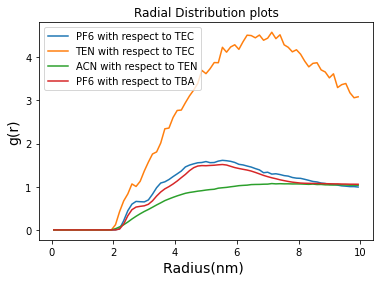

In [ ]:


plt.plot(x1,y1, label = "PF6 with respect to TEC")

plt.plot(x2,y2, label ="TEN with respect to TEC")

plt.plot(x3,y3, label = "ACN with respect to TEN")

plt.plot(x4,y4, label ="PF6 with respect to TBA")



plt.xlabel("Radius(nm) ", fontsize = 14)        # x axis label
plt.ylabel("g(r)", fontsize = 14)               # y axis label

plt.title("Radial Distribution plots")
plt.legend()
plt.show


In [ ]:
slice_2 = load_from_MD_TRAJ[1:2]
print(slice_2)

<mdtraj.Trajectory with 1 frames, 98436 atoms, 11471 residues, and unitcells>


In [ ]:
slice_2.save_gro("new_file_1.gro")
slice_2.save_xtc("new_file_1.xtc")

In [ ]:
MD_system_3 = mda.Universe("/content/new_file_1.gro", "/content/new_file_1.xtc")

In [ ]:
import MDAnalysis.analysis.msd as msd

MSD = msd.EinsteinMSD(MD_system_3, select='all', msd_type='xyz', fft=False)
MSD.run()

AttributeError: ignored

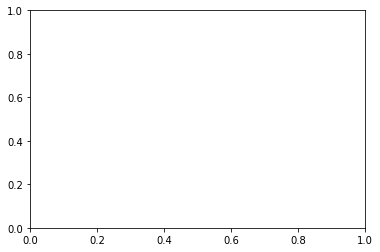

In [ ]:
nframes = MSD.n_frames
timestep = 1  # this needs to be the actual time between frames
lagtimes = np.arange(nframes)*timestep    # make the lag-time axis
fig = plt.figure()
ax = plt.axes()



# plot the actual MSD
ax.plot(lagtimes, msd, lc = "black", ls ="-", label = r'3D random walk')
exact = lagtimes*6
# plot the exact result
ax.plot(lagtimes, exact, lc="black", ls="--", label=r'$y=2 D\tau$')
plt.show()

In [ ]:
for ts in MD_system_2.trajectory[0:100]:

 frame = ts.frame

 #print(frame)


In [ ]:
 #for ts in MD_system.trajectory[9:-10:5]:    #ts is time step
  # print(ts.frame)




 #print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, MD_system.trajectory.time))
 #print("Rgyr: {0:g} A".format(MD_system.atoms.radius_of_gyration()))

#Frame:     0, Time:    0.000 ps
#Rgyr: 16.669 A
#Frame:     1, Time:    1.000 ps
#Rgyr: 16.6732 A
#Frame:     2, Time:    2.000 ps


In [ ]:
#frame_selected = MD_system.trajectory[50]
#ts.frame

50

In [ ]:
Rgyr = []
selecting_atoms = MD_system_2.select_atoms("resname ACN", "resname TEC")
for ts in MD_system_2.trajectory:
   Rgyr.append((MD_system_2.trajectory.time, selecting_atoms.radius_of_gyration()))
Rgyr = np.array(Rgyr)


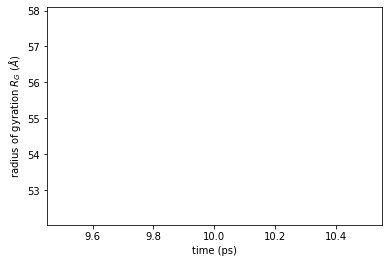

In [ ]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
#ax.figure.savefig("Rgyr.pdf")
plt.draw()

In [ ]:
from MDAnalysis.analysis.base import (AnalysisBase,AnalysisFromFunction,analysis_class)

In [ ]:
#from backcall.backcall import sys
#system = MD_system.select_atoms("resid 1:1000", updating=True)


#rog = AnalysisFromFunction(radgyr, MD_system.trajectory,
                           #system, system.masses,
                           #total_mass=np.sum(system.masses))
#rog.run();

In [ ]:
class RadiusOfGyration2(AnalysisBase):  # subclass AnalysisBase

    def __init__(self, atomgroup, verbose=True):
        """
        Set up the initial analysis parameters.
        """
        # must first run AnalysisBase.__init__ and pass the trajectory
        trajectory = atomgroup.universe.trajectory
        super(RadiusOfGyration2, self).__init__(trajectory,
                                               verbose=verbose)
        # set atomgroup as a property for access in other methods
        self.atomgroup = atomgroup
        # we can calculate masses now because they do not depend
        # on the trajectory frame.
        self.masses = self.atomgroup.masses
        self.total_mass = np.sum(self.masses)

    def _prepare(self):
        """
        Create array of zeroes as a placeholder for results.
        This is run before we begin looping over the trajectory.
        """
        # This must go here, instead of __init__, because
        # it depends on the number of frames specified in run().
        self.results = np.zeros((self.n_frames, 6))
        # We put in 6 columns: 1 for the frame index,
        # 1 for the time, 4 for the radii of gyration

    def _single_frame(self):
        """
        This function is called for every frame that we choose
        in run().
        """
        # call our earlier function
        rogs = radgyr(self.atomgroup, self.masses,
                      total_mass=self.total_mass)
        # save it into self.results
        self.results[self._frame_index, 2:] = rogs
        # the current timestep of the trajectory is self._ts
        self.results[self._frame_index, 0] = self._ts.frame
        # the actual trajectory is at self._trajectory
        self.results[self._frame_index, 1] = self._trajectory.time

    def _conclude(self):
        """
        Finish up by calculating an average and transforming our
        results into a DataFrame.
        """
        # by now self.result is fully populated
        self.average = np.mean(self.results[:, 2:], axis=0)
        columns = ['Frame', 'Time (ps)', 'Radius of Gyration',
                   'Radius of Gyration (x-axis)',
                   'Radius of Gyration (y-axis)',
                   'Radius of Gyration (z-axis)',]
        self.df = pd.DataFrame(self.results, columns=columns)

NameError: ignored

In [ ]:
rog_base = RadiusOfGyration2(simulation_1, verbose=True).run()

In [ ]:
rog_base.average

In [ ]:
rog_base.df

In [ ]:
ax = rog_base.df.plot(x='Time (ps)', y=rog_base.df.columns[2:])
ax.set_ylabel('Radius of gyration (A)');

In [ ]:
from MDAnalysis.analysis import rdf

In [ ]:
#PF6 = MD_system.select_atoms("resname PF6", updating=True)
#TEC = MD_system.select_atoms("resname TEC", updating=True)


In [ ]:
print(x)